## ЛР5  
поиск экстремума функции следующими методами: Ньютона, Ньютона с одномерной оптимизацией, Ньютона с фиксированной обратной матрицей Гёссе, метод Пауэла.

In [1]:
import Pkg
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Anastasia\.julia\environments\v1.10\Manifest.toml`


In [28]:
using Plots
using LinearAlgebra

function f(x)
    return (x[1]+x[2])^2 + (x[2]+2)^2
    #return x[1]^2 + x[2]^2
    #return (1-x)^2 + 100(y-x^2)^2
end

f (generic function with 1 method)

In [29]:
using LinearAlgebra

x0 = [6.0,-1.0]
eps = 0.18

function df_dx(func, x, y)
    i = 0.001
    return (func([x + i, y]) - func([x - i, y])) / (2i)
end

function df_dy(func,x, y)
    i = 0.001
    return (func([x, y + i]) - func([x, y - i])) / (2i)
end

function d2f_dx2(func, x, y)
    i = 0.001
    return (func([x + i, y]) - 2*func([x, y]) + func([x - i, y])) / (i^2)
end

function d2f_dxdy(func, x, y)
    i = 0.001
    return (func([x + i, y+i]) - func([x+i, y-i]) - func([x - i, y+i]) + func([x-i, y-i])) / (4*i^2)
end

function d2f_dy2(func, x, y)
    i = 0.001
    return (func([x, y + i]) - 2*func([x, y]) + func([x, y - i])) / (i^2)
end

function anti_gradient(func, x)
    return [(-1)*df_dx(func, x[1],x[2]), (-1)*df_dy(func, x[1],x[2])]
end

function inv_hessian(func, x)
    hess = [d2f_dx2(func,x[1],x[2]) d2f_dxdy(func,x[1],x[2]); d2f_dxdy(func,x[1],x[2]) d2f_dy2(func,x[1],x[2])]
    return inv(hess)
end
xs = []

Any[]

### Метод Ньютона

Экстремум: [2.0, -2.0]
Количество итераций: 2


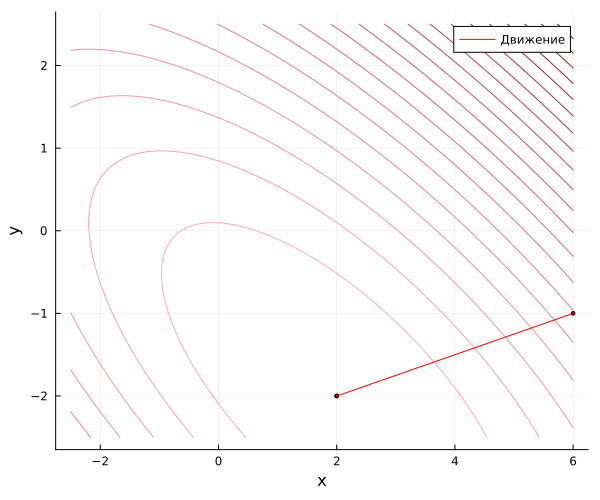

In [16]:
# xs = []

function newton()
     x = x0
     iters = 1
     push!(xs, x)
     while true
        g = anti_gradient(f,x)
        h = inv_hessian(f,x)
        x_new = x + h * g
        push!(xs, x_new)
        if norm(g) < eps
            return x_new, iters
        end

        x = x_new
        iters += 1
    end
end

res, its = newton()
println("Экстремум: ", res)
println("Количество итераций: ", its)

x_coords = [x[1] for x in xs]
y_coords = [y[2] for y in xs]
x = -2.5:0.1:6
y = -2.5:0.1:2.5

contour(x, y, (x, y) -> f([x, y]), levels=20, c=:reds, xlabel="x", ylabel="y", colorbar=false, size=(600, 500))
p = plot!(x_coords, y_coords, label="Движение", line=:red)
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
display(p)

#### метод Свенна для локализации минимума

In [17]:
function swann(func, xi0, h)
    first = xi0
    second = xi0 + h
    last = second + h

    f1 = func(first)
    f2 = func(second)
    f3 = func(last)
    while (f1 > f2) && (f2 > f3)
        first = second
        second = last
        last = last + h

        f1 = f2
        f2 = f3
        f3 = func(last)
    end
    if second < last
        return (first, last)
    else
        return (last, first)
    end
end

swann (generic function with 1 method)

#### метод золотого сечения для поиска минимума

In [18]:
function golden_section(func, a,b, eps)
    t = (sqrt(5.0) - 1.0)/2.0
    x1 = b - t*(b-a)
    x2 = a + t*(b-a)
    while abs(b - a) > eps
        f1 = func(x1)
        f2 = func(x2)
        if (f1 <= f2)
            b = x2
            x2 = x1
            x1 = a+b-x2
        else
            a = x1
            x1 = x2
            x2 = a+b-x1
        end
    end
    return (a+b)/2
end

golden_section (generic function with 1 method)

### Метод Ньютона с одномерной оптимизацией

Экстремум: [2.0000000058363074, -1.9999999985412964]
Количество итераций: 2


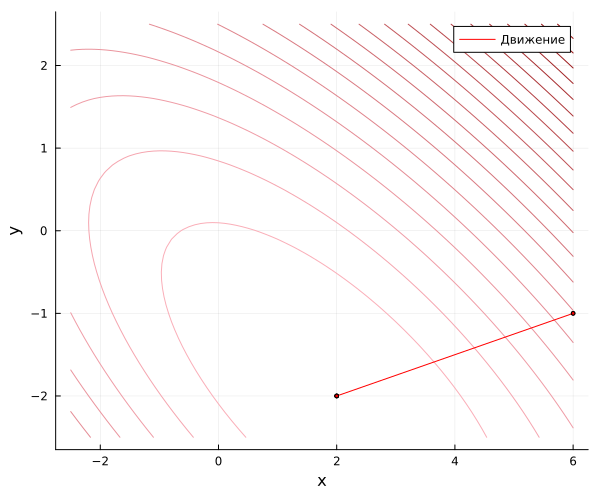

In [19]:
# xs = []

function newton_rafson()
     x = x0
     iters = 1
     alpha = 0.0
     push!(xs, x)
    
     while true
        g = anti_gradient(f,x)
        h = inv_hessian(f,x)
        
        gfun(alp) = f(x + alpha*h * g)
        a, b = swann(gfun, 1, 0.0001)
        alpha = golden_section(gfun, a, b, 0.0001)
        
        x_new = x + alpha*h * g
        push!(xs, x_new)
        
        if norm(g) < eps
            return x_new, iters
        end

        x = x_new
        iters += 1
    end
end

    
res, its = newton_rafson()
println("Экстремум: ", res)
println("Количество итераций: ", its)

x_coords = [x[1] for x in xs]
y_coords = [y[2] for y in xs]
x = -2.5:0.1:6
y = -2.5:0.1:2.5

contour(x, y, (x, y) -> f([x, y]), levels = 20, xlabel="x", ylabel="y", c=:reds, colorbar=false, size=(600, 500))
p = plot!(x_coords, y_coords, label="Движение", line=:red)
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
display(p)

### Метод Ньютона с фиксированной обратной матрицей Гессе

Экстремум: [2.000000005836693, -1.9999999985415733]
Количество итераций: 2


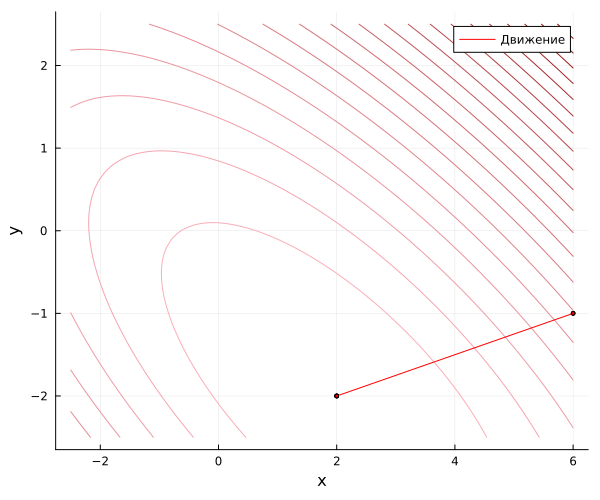

In [20]:
# xs = []

function newton_with_fixH()
     x = x0
     iters = 1
     alpha = 0.0
     push!(xs, x)
     h = inv_hessian(f,x)
    
     while true
        g = anti_gradient(f,x)
        gfun(alp) = f(x + alpha*h * g)
        a, b = swann(gfun, 1, 0.0001)
        alpha = golden_section(gfun, a, b, 0.0001)
        
        x_new = x + alpha*h * g
        push!(xs, x_new)
        
        if norm(g) < eps
            return x_new, iters
        end

        x = x_new
        iters += 1
    end
end

res, its = newton_with_fixH()
println("Экстремум: ", res)
println("Количество итераций: ", its)

x_coords = [x[1] for x in xs]
y_coords = [y[2] for y in xs]
x = -2.5:0.1:6
y = -2.5:0.1:2.5

contour(x, y, (x, y) -> f([x, y]), levels = 20, xlabel="x", ylabel="y", c=:reds, colorbar=false, size=(600, 500))
p = plot!(x_coords, y_coords, label="Движение", line=:red)
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
display(p)

### метод Пауэла
#### + метод квадратичной аппроксимации, являющийся составной частью метода Пауэла

Экстремум: [1.7499999999971045, -1.8749999999985534]
Количество итераций: 3


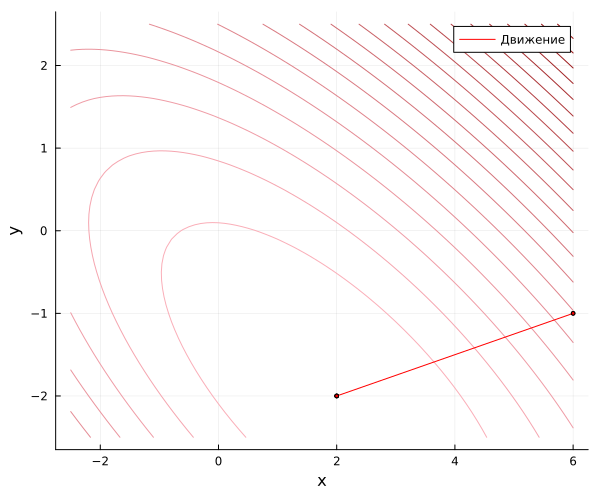

In [9]:
function square_approximation(x0, x1, x2, y0, y1, y2)
    a0 = y0
    a1 = (y1-y0) / (x1-x0)
    a2 = (1.0 / (x2-x1)) * ((y2-y0) / (x2-x0) - (y1-y0) / (x1-x0))
    x_star = (x1+x0) / 2.0 - a1 / (2.0*a2)
    return x_star
end

function pauel_method(delta_x, delta_y)
    x_best = copy(x0)
    iters  = 0
    xs = [x0]
    
    while true
      # по х
      x0 = copy(x_best)
      # x1 x2 - точки по обе стороны от "наилучшей"
      x1 = [x0[1] + delta_x, x0[2]]
      x2 = []
      y0 = f(x0)
      y1 = f(x1)
      
      if(y0 > y1) # т.е. функция минимизируется
          x2 = x0 + [2.0 * delta_x, 0.0]
        else # т.е. функция наоборот растет (неубывает)
          x2 = x0 - [delta_x, 0.0]
      end
        
      y2 = f(x2)
      # вычисляем х* с помощью формулы кв. аппроксимации
      x_star = [square_approximation(x0[1], x1[1], x2[1], y0, y1, y2), x0[2]]
      
      # находим у_мин и соответствующий ему х_мин
      y_min = min(y0, y1, y2)
      if (y_min == y0)
          x_min = copy(x0)
      elseif(y_min == y1)
          x_min = copy(x1)
      else
          x_min = copy(x2)
      end
      
      # выбираем наилучшую точку между х* и х__min
      x_best = []
      if(y_min > f(x_star))
          x_best = copy(x_star)
      else
          x_best = copy(x_min)
      end

      # аналогично по y, тк у нас не одномерный случай
      x0 = copy(x_best)
      x1 = x0 + [0.0, delta_y]
      x2 = []
      y0 = f(x0)
      y1 = f(x1)

      if(y0 > y1)
          x2 = x0 + [0.0, 2.0 * delta_y]
      else
          x2 = x0 - [0.0, delta_y]
      end
        
      y2 = f(x2)
      x_star = [x0[1], square_approximation(x0[2], x1[2], x2[2], y0, y1, y2)]
        
      y_min = min(y0, y1, y2)   
      if (y_min == y0)
          x_min = copy(x0)
      elseif(y_min == y1)
          x_min = copy(x1)
      else
          x_min = copy(x2)
      end

      if(y_min > f(x_star))
          x_best = copy(x_star)
      else
          x_best = copy(x_min)
      end
        
      iters += 1
      push!(xs, x_best)
    
      # проверяем условие 
      if(norm(x_min - x_star) <= eps)
          return x_best, iters
      end
        
    end
end

res, its = pauel_method(0.01, 0.01)
println("Экстремум: ", res)
println("Количество итераций: ", its)

x_coords = [x[1] for x in xs]
y_coords = [y[2] for y in xs]
x = -2.5:0.1:6
y = -2.5:0.1:2.5

contour(x, y, (x, y) -> f([x, y]), levels = 20, xlabel="x", ylabel="y", c=:reds, colorbar=false, size=(600, 500))
p = plot!(x_coords, y_coords, label="Движение", line=:red)
scatter!(x_coords, y_coords, markersize=2, markershape=:circle, markercolor=:red, label = "")
display(p)

#  ЛР 6

### Метод Нельдера-Мида (деформируемых многогранников)

Точка экстремума
Симплексный алгоритм: [1.9978997916637335, -2.0002918714906706]
Нельдер-Мид: [1.9803776258664683, -1.9986732989178047]


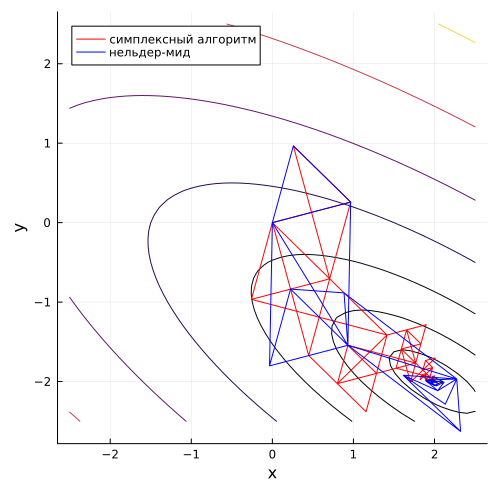

In [2]:
using Plots
using LinearAlgebra

function f(x)
    return (x[1]+x[2])^2 + (x[2]+2)^2
end

xs = []

println("Точка экстремума")

function simplex_method()
    x1 = [0,0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        if(norm(points[1]- points[2])) < 0.001
            return points[1]
        end
        if(f(points[2]) >= f(points[1]) && f(points[2]) >= f(points[3]))
            temp = points[1]
            points[1] = points[2]
            points[2] = temp
        elseif (f(points[3]) >= f(points[1]) && f(points[3]) >= f(points[2]))
            temp = points[1]
            points[1] = points[3]
            points[3] = temp
        end
        x4 = points[2] + points[3] - points[1]
        if(f(x4) >= f(points[2]) && f(x4) >= f(points[3]))
            points[1] = x4
            points[2] = x4+(points[2] - x4)/2
            points[3] = x4+(points[3] - x4)/2
            push!(xs, x4)
            push!(xs, points[2])
            push!(xs, points[3])
        else
            points[1] = x4
            push!(xs, x4)
            push!(xs, points[2])
            push!(xs, points[3])
        end
    end
end

r = simplex_method()
println("Симплексный алгоритм: ", r)
x_coords_simplex = [x[1] for x in xs]
y_coords_simplex = [y[2] for y in xs]


function nelder_meed()
    x1 = [0.0,0.0]
    x2 = [(sqrt(3)+1)/(2*sqrt(2)), (sqrt(3)-1)/(2*sqrt(2))]
    x3 = [(sqrt(3)-1)/(2*sqrt(2)), (sqrt(3)+1)/(2*sqrt(2))]
    points = [x1,x2,x3]
    points[1] = x1
    points[2] = x2
    points[3] = x3
    xs = []
    center = [0.0,0.0]
    beta = 2.0
    push!(xs, x1)
    push!(xs, x2)
    push!(xs, x3)
    while true
        points = sort(points, by=x -> f(x), rev=true)
        push!(xs, points[3])
        push!(xs, points[1])
        push!(xs, points[2])
        push!(xs, points[3])
        center = (points[2]+points[3])/2.0
        if (sqrt(((f(points[1]) - f(center))^2 +((f(points[2]) - f(center))^2) + ((f(points[2]) - f(center))^2))/(3.0)) < 0.001)
            return  points[3],xs
        end
        x4 = points[2]+points[3]-points[1]
        beta = 2.0
        y_min =  f(points[3])
        if(f(x4) < y_min)
            beta = 2.0
            x5 = beta*x4 + (1-beta)*center
            if(f(x5)< f(x4) && f(x5)< f(points[3]) && f(x5)< f(points[2]))
                points[1] = x5
            else
                if(f(x5) > f(x4))
                    points[1] = x4
                end
            end
        else
            if f(points[3]) < f(x4) < f(points[2])
                points[1] = x4
            else
                if f(points[2]) < f(x4) < f(points[1])
                    points[1] = x4
                end
                points = sort(points, by=x -> f(x), rev=true)
                beta = 0.5
                x5 = beta * points[1] + (1 - beta) * center
                if f(x5) < f(points[1])
                    points[1] = x5
                else
                    #c
                    points[1] = points[3] + 0.5 * (points[1] - points[3])
                    points[2] = points[3] + 0.5 * (points[2] - points[3])
                end
            end
        end
    end
end

res,xs = nelder_meed()
println("Нельдер-Мид: ", res)

x_coords_nm = [x[1] for x in xs]
y_coords_nm = [y[2] for y in xs]

x = -2.5:0.1:2.5
y = -2.5:0.1:2.5

levels = []
for i in 1:10
    push!(levels, i^4*0.01)
end

contour(x, y, (x, y) -> f([x, y]), levels = levels, xlabel="x", ylabel="y", colorbar=false, size=(500, 500))
p = plot!(x_coords_simplex, y_coords_simplex, label="симплексный алгоритм", line=:red)
plot!(x_coords_nm, y_coords_nm, label="нельдер-мид", line=:blue)

# for (i, (x, y)) in enumerate(xs)
#     annotate!(x, y, text(string(i), :black, :left, 10))
# end

display(p)